In [1]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from functools import reduce
import itertools as it
import seaborn as sns
from collections import Counter
import numpy
from matplotlib.pyplot import figure

In [2]:
sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes
sns.color_palette('pastel')


[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

In [3]:
max_strat = 6
min_strat = -5
max_score = 5
min_score = -5

pairs = 125
generations = 160
print(generations)
population = 100

cost = 0.1
benefit = 1
score_benefit = 1

mutation = 0.000
# TODO -> Mais pequeno

simulations = pow(10,3)



160


In [4]:
class Agent:
    def __init__(self, strategy, score, payoff):
        self.payoff = payoff
        self.strategy = strategy
        self.score = score
        
    def add_score(self, new_score):
        temp_score = new_score + self.score
        if temp_score >= min_score and temp_score <= max_score:
             self.score = temp_score
        elif temp_score <= min_score:
            self.score = min_score
        elif temp_score >= max_score:
            self.score = max_score

In [5]:
def selectOne(population):
    max_value     = sum([c.payoff for c in population])
    pick    = random.uniform(0, max_value)
    current = 0
    for agent in population:
        current += agent.payoff
        if current >= pick:
                return agent

In [6]:
def ProbabilityList(population_d):
    fitness = [c.payoff for c in population_d ]
    total_fit = sum(fitness)
    relative_fitness = [f/total_fit for f in fitness]
    return relative_fitness

def FitnessChoices(population, relative_fitness, number):
    return random.choices(population, weights = relative_fitness, k = number)

1000
simulation:  0
simulation:  10
simulation:  20
simulation:  30
simulation:  40
simulation:  50
simulation:  60
simulation:  70
simulation:  80
simulation:  90
simulation:  100
simulation:  110
simulation:  120
simulation:  130
simulation:  140
simulation:  150
simulation:  160
simulation:  170
simulation:  180
simulation:  190
simulation:  200
simulation:  210
simulation:  220
simulation:  230
simulation:  240
simulation:  250
simulation:  260
simulation:  270
simulation:  280
simulation:  290
simulation:  300
simulation:  310
simulation:  320
simulation:  330
simulation:  340
simulation:  350
simulation:  360
simulation:  370
simulation:  380
simulation:  390
simulation:  400
simulation:  410
simulation:  420
simulation:  430
simulation:  440
simulation:  450
simulation:  460
simulation:  470
simulation:  480
simulation:  490
simulation:  500
simulation:  510
simulation:  520
simulation:  530
simulation:  540
simulation:  550
simulation:  560
simulation:  570
simulation:  580
sim

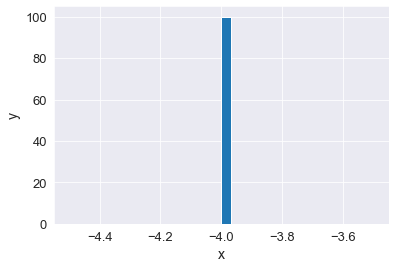

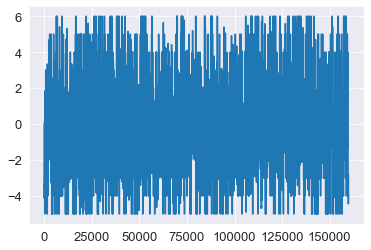

Done! :D


In [7]:
mean_strategy_per_generation = []
mean_payoff_per_generation = []
global_strategies = []

print(simulations)
for simulation in range(simulations) :

    if simulation % 10 == 0:
        print("simulation: ", simulation)
    agents = []
    for i in range(population):
        agents.append(Agent(random.randint(min_strat, max_strat), 0,0))
    
    for generation in range(generations) :
        #if(generation % 1000 == 0):
        #    print(generation)
        for pair in range(pairs) :
            donor,recipient = random.sample(agents, 2)
            
            if recipient.score >= donor.strategy:
                
                recipient.payoff += benefit
                donor.add_score(score_benefit)
                if donor.payoff >= cost:
                    donor.payoff -= cost
                
            else:
                donor.add_score(-score_benefit)

        
        payoffs = []
        for agent in agents:
            payoffs.append(agent.payoff)

        
        agents.sort(key=lambda x: x.payoff, reverse=True)
        for agent in range(len(agents)):       
            parent = selectOne(agents)
            agents[agent].strategy = parent.strategy
       
                        
            
        estrategias = []
        total = 0
        for agent in agents:
            estrategias.append(agent.strategy)
            global_strategies.append(agent.strategy)
            

            estrategias_numpy = numpy.array(estrategias)
        payoffs_numpy = numpy.array(payoffs)

        
        mean_strategy_per_generation.append(estrategias_numpy.mean())
        mean_payoff_per_generation.append(payoffs_numpy.mean())
        

points=[]

for agent in agents:
    points.append(agent.strategy)
    
plt.hist(points, bins=30)
plt.ylabel('y')
plt.xlabel("x")
plt.show()
        
global_strategies_numpy = numpy.array(global_strategies)
plt.plot(mean_strategy_per_generation)
plt.show()
print("Done! :D")

In [8]:
sum(mean_strategy_per_generation)/len(mean_strategy_per_generation)


-0.07991025000000003

In [9]:
def get_graph_with_color_and_size(width, height, dpi, data, background_color, palette_color, y_lim):
    figure(figsize=(width, height), dpi=dpi)
    ax = plt.gca()
    ax.set_facecolor(background_color)
    if y_lim > 0:
        ax.set_ylim([0, y_lim])

    plt.xlabel('Time (thousands of generations)',fontname='Helvetica')
    plt.ylabel('Strategy, k',fontname='Helvetica')
    plt.title('Average k for every generation',fontname='Helvetica')
    plt.plot(data, color=sns.color_palette('Set2')[palette_color])
    plt.show()

Counter({-3: 1914540, -5: 1782843, -1: 1751622, 0: 1490785, -2: 1301265, -4: 1262664, 2: 1255348, 4: 1123176, 6: 1084178, 5: 1065555, 3: 989906, 1: 978118})


findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


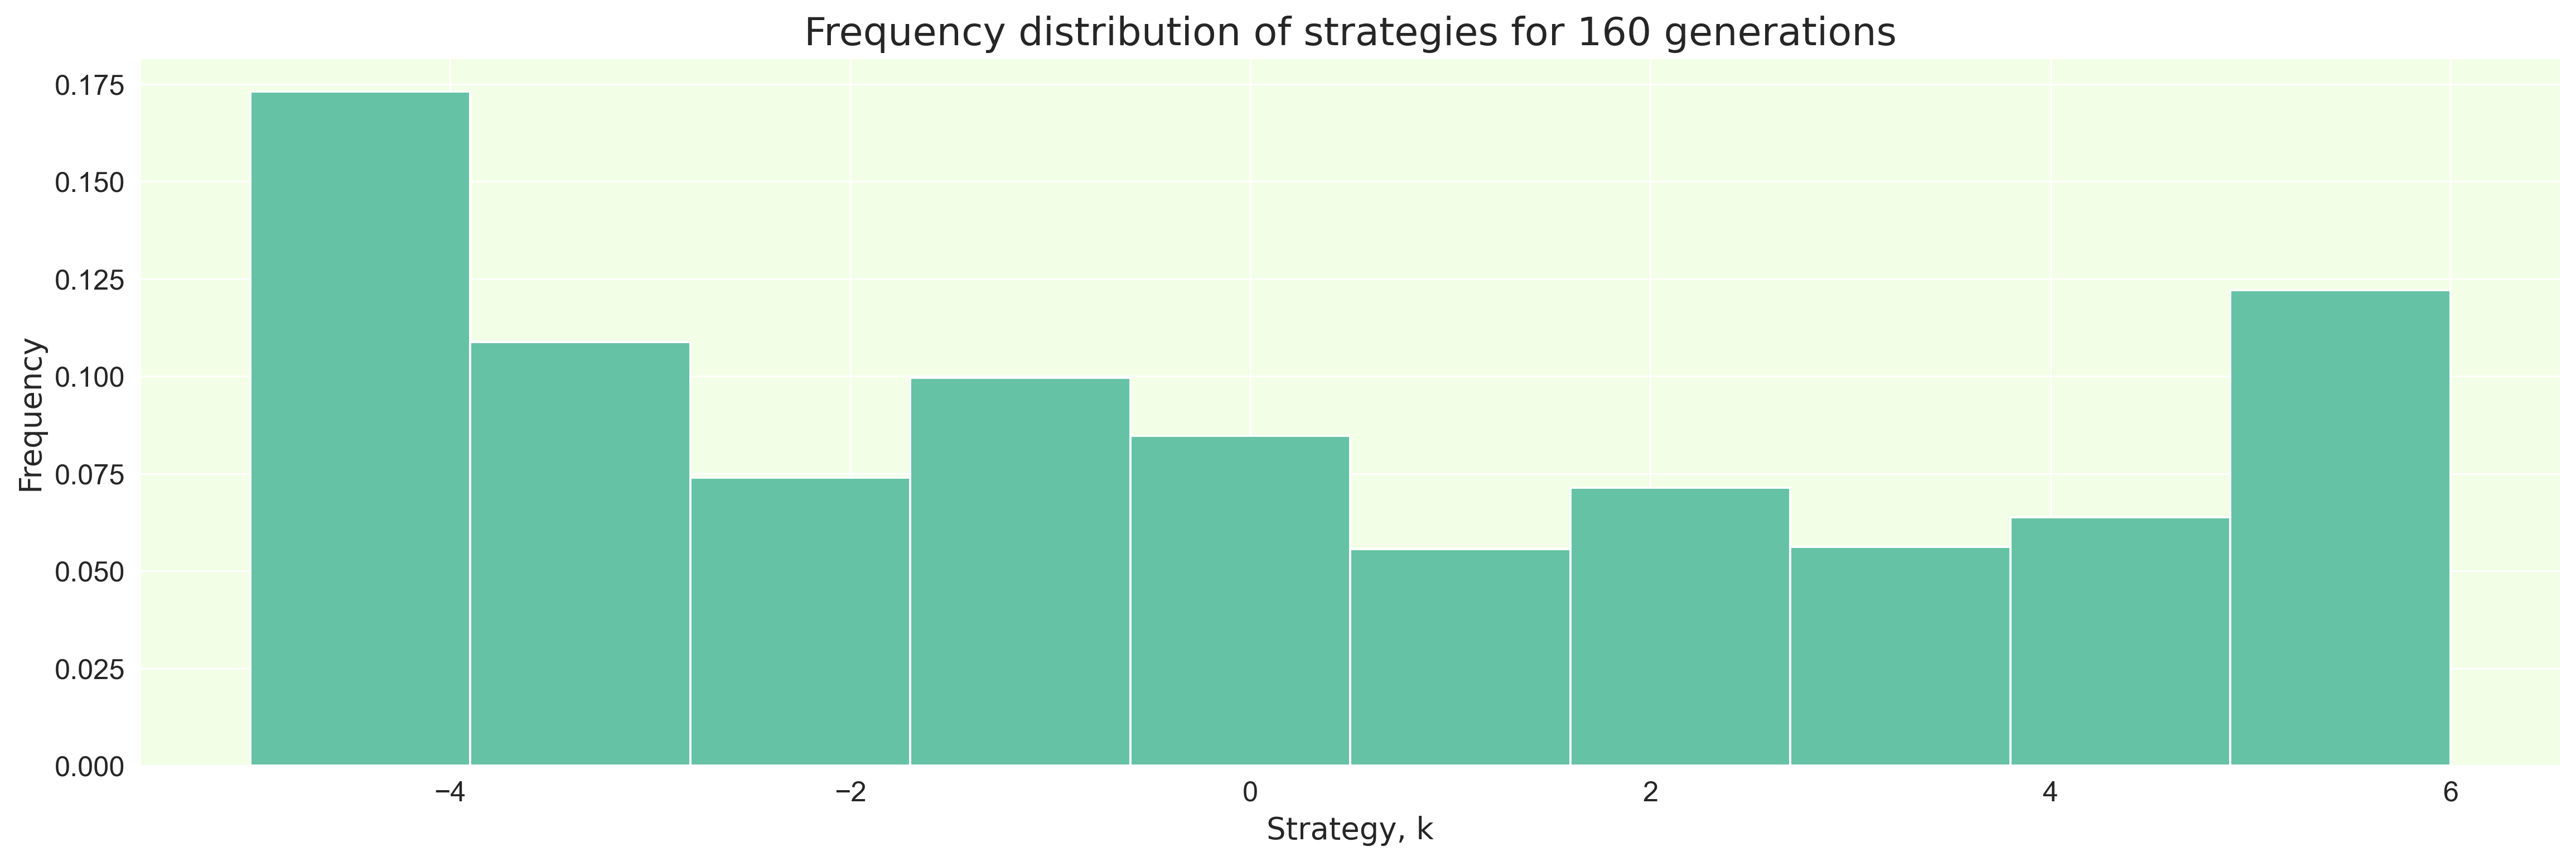

In [10]:
figure(figsize=(20, 6), dpi=280)

plt.xlabel('Strategy, k',fontname='Helvetica')
plt.ylabel('Frequency',fontname='Helvetica')
ax = plt.gca()
ax.set_facecolor("#f2ffe6")

plt.title('Frequency distribution of strategies for {} generations'.format(generations),fontname='Helvetica')
x = range(0,generations)
print(Counter(global_strategies_numpy))
plt.hist( global_strategies_numpy, color=sns.color_palette('Set2')[0], linewidth=1, density=True)
plt.show()